# 20143750 KIM SU BIN

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy import signal
from skimage import io, color
from skimage import exposure
from scipy import fftpack

Setting the basic libraries.

In [6]:
file_image	= 'cau.jpg'

im_color 	= io.imread(file_image)
im_gray  	= color.rgb2gray(im_color)
im          = (im_gray - np.mean(im_gray)) / np.std(im_gray)
(row, col)  = im.shape

noise_std   = 0.2 # try with varying noise standard deviation
noise       = np.random.normal(0, noise_std, (row, col))
im_noise    = im + noise

Set the image color, image gray, image, image noise. 
Later, I will set the varying noise standard deviation.

c:\users\subin\appdata\local\programs\python\python37\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Text(0.5, 1.0, 'Fourier transform')

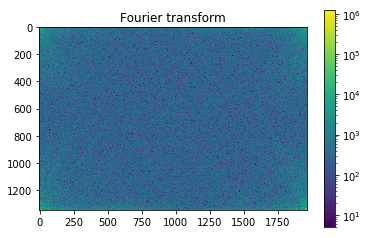

In [9]:
im_recon    = im # this must be replaced with the reconstructed (denoised) image
im_fft=fftpack.fft2(im_noise)
noise_recon = im_noise - im_recon
error       = np.linalg.norm(im - im_recon)

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()
    
plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

c:\users\subin\appdata\local\programs\python\python37\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


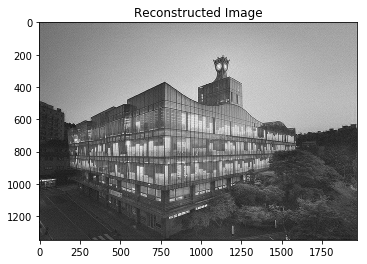

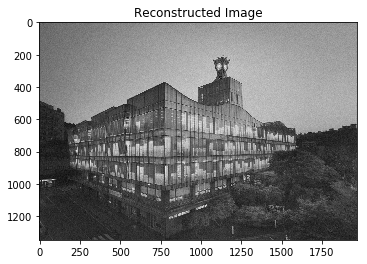

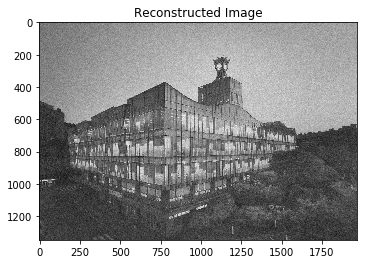

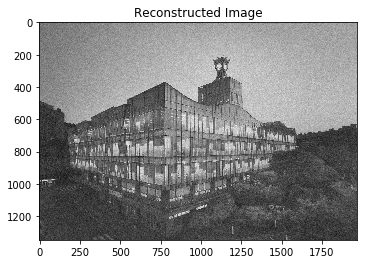

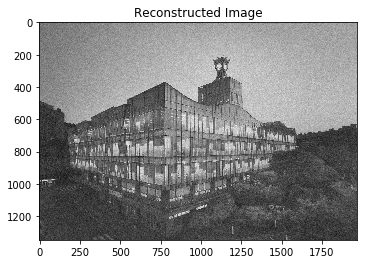

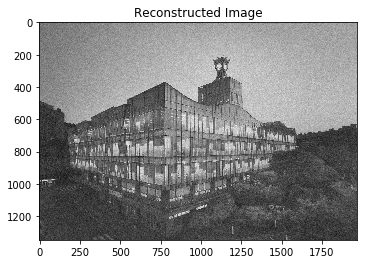

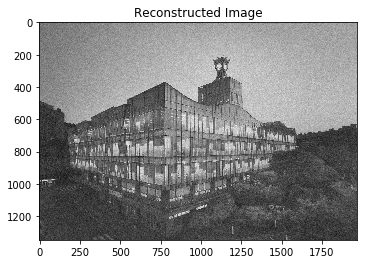

In [16]:

keep_fraction=[1/8,1/4,1/2,1,2,4,8]
for one_keep in keep_fraction:
    im_fft2=im_fft.copy()
    r, c=im_fft2.shape
    
    im_fft2[int(r*one_keep):int(r*(1-one_keep))]=0
    im_fft2[:, int(c*one_keep):int(c*(1-one_keep))]=0
    
    im_recon=fftpack.ifft2(im_fft2).real
    
    plt.figure()
    plt.imshow(im_recon, plt.cm.gray)
    plt.title('Reconstructed Image')


I choose the parameter 1/8, 1/4, 1/2, 1, 2, 4, 8. 
And apply them to noise image. The above images are result images.

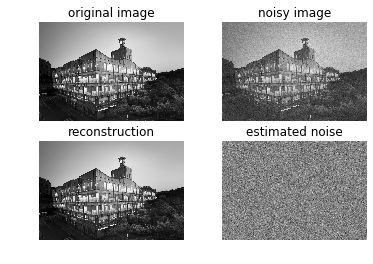

In [10]:
p1 = plt.subplot(2,2,1)
p1.set_title('original image')
plt.imshow(im, cmap='gray')
plt.axis('off')

p2 = plt.subplot(2,2,2)
p2.set_title('noisy image')
plt.imshow(im_noise, cmap='gray')
plt.axis('off')

p3 = plt.subplot(2,2,3)
p3.set_title('reconstruction')
plt.imshow(im_recon, cmap='gray')
plt.axis('off')

p4 = plt.subplot(2,2,4)
p4.set_title('estimated noise')
plt.imshow(noise_recon, cmap='gray')
plt.axis('off')

plt.show()

The above images are original images.

## My github address  https://github.com/lauren026/assignment11